In [ ]:
import numpy as np
import math
import numpy.matlib as matlib
import matplotlib.pyplot as plt
import operator

from time import perf_counter
import scipy.stats

In [ ]:
class Noisy_Gaussian:
    
    def __init__(self, mean, cov_mat, noise_presence, exact_gaus_noise_var, 
                 nature_of_noise = 'artificial_gaus'):
        self.mean = mean
        self.cov_mat = cov_mat
        self.dim = mean.size

        self.noise_presence = noise_presence
        self.exact_gaus_noise_var = exact_gaus_noise_var
        self.nature_of_noise = 'artificial_gaus'
    
    
    def energy(self, x): # constant coeff is discarded
        return 0.5*((x - self.mean).dot(np.linalg.inv(self.cov_mat)).dot(x - self.mean)) 
        
   
    def ener_grad(self, x):
#      if noise_presence == True:
#        noise = np.sqrt(self.exact_gaus_noise_var)*np.random.standard_normal(self.dim)
#        return (np.linalg.inv(self.cov_mat)).dot(x - self.mean) + noise
#      
#      else:
      return (np.linalg.inv(self.cov_mat)).dot(x - self.mean)

# Briefly test my Bayesian Linear Regression function.

The 2-dimensional standard Gaussian distribution has been used to test my SBPS algorithm.

In [ ]:
mean = np.zeros(2)
cov_mat = np.identity(2)
noise_presence = True
exact_gaus_noise_var = 0.001

Test_Gaussian = Noisy_Gaussian(mean, cov_mat, noise_presence, exact_gaus_noise_var)

First, test roughly whether Bayesian_Linear_Regression (the double Guassian prior version) outputs sensible predicted values of hat_beta_0, hat_beta_1, Sigma_cov_mat.

In [ ]:
# with the following choice of starting position and velocity, the particle is moving in a direction
# that is experiencing an increase in energy.

# The target distribution is 2-dimensional standard Gaussian.

x = np.array([1000,1000])
v = np.array([1,1])

delta_U_tilde, G_tilde, emp_var, log_grad_list = eval_G_tilde_plus_emp_var(x, v, Test_Gaussian)

In [ ]:
# We allow the particle to move for 5.5 units of time from x with velocity v.

array_of_test_obs = np.array([[0, G_tilde, emp_var]])

for i in np.arange(0.5,6,0.5):
  delta_U_tilde, G_tilde, emp_var, log_grad_list = eval_G_tilde_plus_emp_var(x + i*v, v, Test_Gaussian)
  new_array = np.array([[i, G_tilde, emp_var]])
  array_of_test_obs = np.concatenate((array_of_test_obs, new_array), axis=0)

In [ ]:
# Perform Bayesian Linear Regression on the observed G_tilde = (v dot delta U) against time.

hat_beta_0, hat_beta_1, Sigma_cov_mat =\
Bayesian_Linear_Regression_doub_gaus(array_of_test_obs, 1, 0, 1, 0)

In [ ]:
array_of_test_obs

array([[0.00000000e+00, 2.00004358e+03, 2.00000000e-03],
       [5.00000000e-01, 2.00093453e+03, 2.00000000e-03],
       [1.00000000e+00, 2.00196675e+03, 2.00000000e-03],
       [1.50000000e+00, 2.00292014e+03, 2.00000000e-03],
       [2.00000000e+00, 2.00394670e+03, 2.00000000e-03],
       [2.50000000e+00, 2.00502820e+03, 2.00000000e-03],
       [3.00000000e+00, 2.00596362e+03, 2.00000000e-03],
       [3.50000000e+00, 2.00710044e+03, 2.00000000e-03],
       [4.00000000e+00, 2.00804969e+03, 2.00000000e-03],
       [4.50000000e+00, 2.00898550e+03, 2.00000000e-03],
       [5.00000000e+00, 2.01002359e+03, 2.00000000e-03],
       [5.50000000e+00, 2.01097976e+03, 2.00000000e-03]])

In [ ]:
hat_beta_0

1998.7922698040159

In [ ]:
hat_beta_1

2.316293448783796

In [ ]:
Sigma_cov_mat

array([[ 5.89372590e-04, -1.53746880e-04],
       [-1.53746880e-04,  5.59172743e-05]])

Let's compare the first 2 columns of array_of_test_obs and hat_beta_0 and hat_beta_1. (hat_beta_0 + hat_beta_1*t) looks like a good fit to the generic dataset in array_of_test_obs.

Let's compare column 3 of array_of_test_obs and Sigma_cov_mat. Note that the noise added to the noisy gradient are independent at different positions. Moreover, our target distribution (Test_Gaussian) only involves a very small noise in the evaluation of gradient (exact_gaus_noise_var = 0.001). It is favourable that all entries of Sigma_cov_mat is small.

# Test my SBPS algorithm on 2D standard normal distribution.

Run the function SBPS on Test_Gaussian:

In [ ]:
x0 = np.array([1,2])
v0 = np.array([-2,0])
Time = 20000
lambda_ref = 0.1
prob_dist = Test_Gaussian
num_lin_reg = 10
k = 3
d_geom = 1


turn_pts, list_of_velo, striding_times, total_evals_list, computational_times =\
SBPS(x0, v0, Time, lambda_ref, prob_dist, num_lin_reg, k, d_geom)

# Plot the bounces and refreshment of the particle.

Now, let's plot some graphs to see if my algorithm is working.

In [ ]:
# np arrays for colourmap

x_coord_raw = np.linspace(-4.5, 4.5, num=401)
x_coord = np.tile(x_coord_raw, (401,1))
y_coord = -np.transpose(x_coord)

ener_vals_gaus = ((x_coord*x_coord)+(y_coord*y_coord))

Plotting 40-48 turning points

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


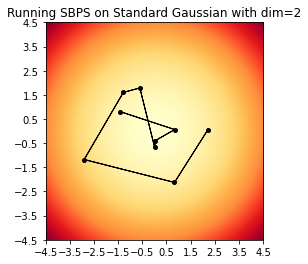

In [ ]:


num_points_plotted = 9
when_to_start_plot = 40


first_coordinate, second_coordinate = np.transpose(np.array(turn_pts))

horizontal = first_coordinate[when_to_start_plot: when_to_start_plot + num_points_plotted]
vertical = second_coordinate[when_to_start_plot: when_to_start_plot + num_points_plotted]

colors = (0,0,0)
area = (np.pi*10)
num_points = len(horizontal)

# Plot

plt.imshow(ener_vals_gaus, cmap='YlOrRd', extent=[-4.5, 4.5, -4.5, 4.5])

plt.yticks(np.arange(-4.5, 5, 1))
plt.xticks(np.arange(-4.5, 5, 1))
plt.axes().set_aspect('equal')

plt.scatter(horizontal, vertical, s=area/2, c = np.array([[0,0,0]]))    # if this example code is correct, 1st arg is x-axis; 2nd arg is y-axis.
plt.title('Running SBPS on Standard Gaussian with dim=2')

for i in range(num_points_plotted - 1):
    plt.arrow(horizontal[i], vertical[i], horizontal[i+1]-horizontal[i], vertical[i+1]-vertical[i], width=0.0001, length_includes_head=True, head_width=0.0001, shape='full')


# plt.annotate('start', (0, 0))
    

plt.show()

Plotting 0-99th turning points

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


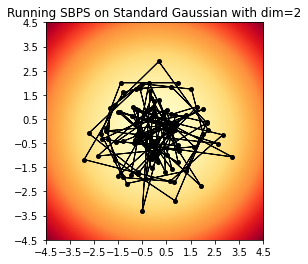

In [ ]:


num_points_plotted = 100
when_to_start_plot = 0


first_coordinate, second_coordinate = np.transpose(np.array(turn_pts))

horizontal = first_coordinate[when_to_start_plot: when_to_start_plot + num_points_plotted]
vertical = second_coordinate[when_to_start_plot: when_to_start_plot + num_points_plotted]

colors = (0,0,0)
area = (np.pi*10)
num_points = len(horizontal)

# Plot

plt.imshow(ener_vals_gaus, cmap='YlOrRd', extent=[-4.5, 4.5, -4.5, 4.5])

plt.yticks(np.arange(-4.5, 5, 1))
plt.xticks(np.arange(-4.5, 5, 1))
plt.axes().set_aspect('equal')

plt.scatter(horizontal, vertical, s=area/2, c = np.array([[0,0,0]]))    # if this example code is correct, 1st arg is x-axis; 2nd arg is y-axis.
plt.title('Running SBPS on Standard Gaussian with dim=2')

for i in range(num_points_plotted - 1):
    plt.arrow(horizontal[i], vertical[i], horizontal[i+1]-horizontal[i], vertical[i+1]-vertical[i], width=0.0001, length_includes_head=True, head_width=0.0001, shape='full')


# plt.annotate('start', (0, 0))
    

plt.show()

# Plot histograms of the 2 coordinates of the MCMC samples

Test whether the samples look like a Gaussian:

In [ ]:
# extract the 0-20000th MCMC samples. Again, samples are taken uniformly every t = 1,
# with respect to the Markov process time.

intermediate_times = np.arange(0,20000.1)

locations_at_required_times, velo_no_later, interm_times =\
x_v_t_arbitrary_times(turn_pts, list_of_velo, striding_times, intermediate_times)


In [ ]:
locations_array = np.array(locations_at_required_times)
horizontal, vertical = np.transpose(locations_array)


(array([9.99950002e-05, 6.99965002e-04, 3.19984001e-03, 1.17994100e-02,
        3.79981001e-02, 1.11294435e-01, 1.89390530e-01, 2.93985301e-01,
        3.65181741e-01, 3.66881656e-01, 2.82685866e-01, 1.85990700e-01,
        1.01694915e-01, 3.79981001e-02, 9.49952502e-03, 1.59992000e-03,
        0.00000000e+00, 0.00000000e+00]),
 array([-4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,
         1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 18 Patch objects>)

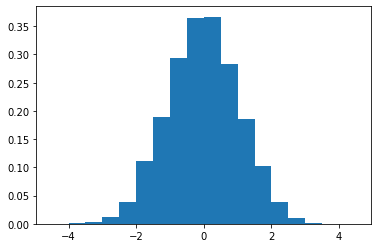

In [ ]:
background_xs = np.linspace(-5, 4.4, 300)
background_ys = np.exp(-background_xs*background_xs/2)


plt.hist(x = vertical, bins=np.arange(-4.5,4.6,0.5), density = True, zorder = 1)
# plt.plot(background_xs, background_ys, color = 'red')

(The vertical coordinates) The following is the empirical proportion of samples falling in the bins of [-4.5, 4, ..., 4, 4.5].

In [ ]:
print(np.array([1.000e+00, 7.000e+00, 3.200e+01, 1.180e+02, 3.800e+02, 1.113e+03,\
       1.894e+03, 2.940e+03, 3.652e+03, 3.669e+03, 2.827e+03, 1.860e+03,\
       1.017e+03, 3.800e+02, 9.500e+01, 1.600e+01, 0.000e+00, 0.000e+00])/20000)

[5.0000e-05 3.5000e-04 1.6000e-03 5.9000e-03 1.9000e-02 5.5650e-02
 9.4700e-02 1.4700e-01 1.8260e-01 1.8345e-01 1.4135e-01 9.3000e-02
 5.0850e-02 1.9000e-02 4.7500e-03 8.0000e-04 0.0000e+00 0.0000e+00]


(array([0.00000000e+00, 9.99950002e-05, 1.49992500e-03, 8.49957502e-03,
        3.63981801e-02, 1.01194940e-01, 1.90890455e-01, 3.00684966e-01,
        3.63081846e-01, 3.62081896e-01, 2.98085096e-01, 1.83790810e-01,
        1.01094945e-01, 3.88980551e-02, 1.12994350e-02, 1.89990500e-03,
        4.99975001e-04, 0.00000000e+00]),
 array([-4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,
         1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 18 Patch objects>)

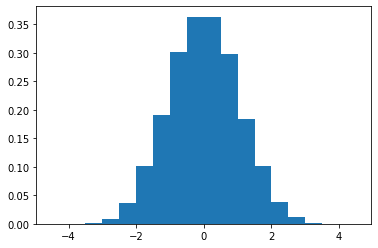

In [ ]:
background_xs = np.linspace(-5, 4.4, 300)
background_ys = np.exp(-background_xs*background_xs/2)


plt.hist(x = horizontal, bins=np.arange(-4.5,4.6,0.5), density = , zorder = 1)

(The horizontal coordinates) The following is the empirical proportion of samples falling in the bins of [-4.5, 4, ..., 4, 4.5].

In [ ]:
print(np.array([0.000e+00, 1.000e+00, 1.500e+01, 8.500e+01, 3.640e+02, 1.012e+03,\
        1.909e+03, 3.007e+03, 3.631e+03, 3.621e+03, 2.981e+03, 1.838e+03,\
        1.011e+03, 3.890e+02, 1.130e+02, 1.900e+01, 5.000e+00, 0.000e+00])/20000)

[0.0000e+00 5.0000e-05 7.5000e-04 4.2500e-03 1.8200e-02 5.0600e-02
 9.5450e-02 1.5035e-01 1.8155e-01 1.8105e-01 1.4905e-01 9.1900e-02
 5.0550e-02 1.9450e-02 5.6500e-03 9.5000e-04 2.5000e-04 0.0000e+00]


Visually, the marginal distributions of both coordinates look like the standard Gaussian distribution. The proportion of samples lying in each 0.5-interval also seems to be very close to the cumulative probability density of the standard Gaussian in that interval.

The following cell computes the theoretical probabilities. Please compare it with the 2 printed arrays just after the 2 histograms. The bins are formed by the boundaries [-4.5, -4, ..., 4, 4.5].



In [ ]:
# looking at the theoretical probabilities of different intervals for 1D standard Gaussian.
theoretical_probabilities_list = []

for i in np.arange(-4.5, 4.5, 0.5):
  theoretical_probabilities_list.append(scipy.stats.norm.cdf(i+0.5) - scipy.stats.norm.cdf(i))

np.array(theoretical_probabilities_list)

array([2.82735687e-05, 2.00957837e-04, 1.11726895e-03, 4.85976729e-03,
       1.65404666e-02, 4.40570693e-02, 9.18480527e-02, 1.49882285e-01,
       1.91462461e-01, 1.91462461e-01, 1.49882285e-01, 9.18480527e-02,
       4.40570693e-02, 1.65404666e-02, 4.85976729e-03, 1.11726895e-03,
       2.00957837e-04, 2.82735687e-05])